# Etapa 1: Importación de bibliotecas y carga de datos


In [17]:
import pandas as pd

# Cargar los datos
df_train = pd.read_csv("credit-train.csv")
df_test = pd.read_csv("credit-test.csv")


# Etapa 2: Análisis numérico y visual
En esta etapa, examinaremos la estructura de los datos y realizaremos análisis numéricos y visuales para comprender mejor las características del conjunto de datos
.s

In [20]:
# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame de entrenamiento:")
print(df_train.head())

print("\nPrimeras filas del DataFrame de prueba:")
print(df_test.head())

# Mostrar las últimas filas del DataFrame
print("\nÚltimas filas del DataFrame de entrenamiento:")
print(df_train.tail())

print("\nÚltimas filas del DataFrame de prueba:")
print(df_test.tail())

# Proporcionar información sobre el DataFrame
print("\nInformación sobre el DataFrame de entrenamiento:")
print(df_train.info())

print("\nInformación sobre el DataFrame de prueba:")
print(df_test.info())

# Proporcionar estadísticas descriptivas para las columnas numéricas
print("\nEstadísticas descriptivas del DataFrame de entrenamiento:")
print(df_train.describe())

print("\nEstadísticas descriptivas del DataFrame de prueba:")
print(df_test.describe())

# Dimensiones del DataFrame
print("\nDimensiones del DataFrame de entrenamiento:", df_train.shape)
print("Dimensiones del DataFrame de prueba:", df_test.shape)

# Nombres de las columnas
print("\nNombres de las columnas del DataFrame de entrenamiento:", df_train.columns)
print("Nombres de las columnas del DataFrame de prueba:", df_test.columns)


Primeras filas del DataFrame de entrenamiento:
   age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...         1    999         0  nonexistent   
1  cellular   nov         fri  ...         1    999         0  nonexistent   
2  cellular   jun         thu  ...         3      6         2      success   
3  cellular   apr         fri  ...         2    999         0  nonexistent   
4  cellular   aug         fri  ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx

### **Observaciones iniciales:**

**Dimensiones de los datos:**
- El conjunto de entrenamiento tiene 41,188 filas y 21 columnas, mientras que el conjunto de prueba tiene 4,119 filas y 20 columnas. Ambos conjuntos tienen una cantidad considerable de datos para trabajar.

**Tipos de datos:**
- La mayoría de las columnas parecen ser variables categóricas, como "job", "marital", "education", etc. Sin embargo, también hay variables numéricas como "age", "duration", "campaign", etc.

**Valores faltantes:**
- No se observan valores faltantes en ninguno de los conjuntos de datos, lo cual es positivo ya que facilita el preprocesamiento.

**Distribución de variables numéricas:**
- Se puede observar la distribución de las variables numéricas mediante las estadísticas descriptivas, lo que nos da una idea de la dispersión y centralidad de los datos.

**Distribución de variables categóricas:**
- Para las variables categóricas, podríamos examinar la frecuencia de cada categoría para comprender su distribución y si hay alguna categoría dominante.

**Variable objetivo (y):**
- La columna "y" parece ser la variable objetivo, con valores binarios 0 y 1. Será importante comprender la distribución de esta variable para asegurarnos de que no haya un desequilibrio significativo entre las clases.


# Etapa 3: Preprocesamiento de datos
En esta etapa, realizaremos el preprocesamiento de datos necesario, que incluirá manejar valores faltantes, codificar variables categóricas y dividir los datos en características (X) y variable objetivo (y).

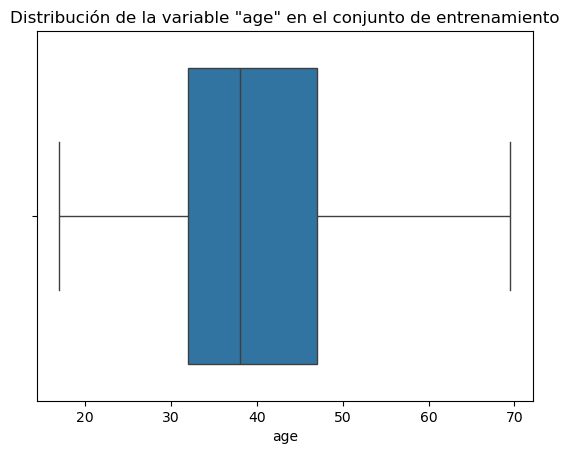

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la distribución de la variable 'age' en el conjunto de entrenamiento
sns.boxplot(x=df_train['age'])
plt.title('Distribución de la variable "age" en el conjunto de entrenamiento')
plt.show()

# Identificar valores atípicos basados en el diagrama de caja
q1 = df_train['age'].quantile(0.25)
q3 = df_train['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Tratar los valores atípicos reemplazándolos con el límite superior o inferior
df_train['age'] = df_train['age'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))




## Eliminar las filas con valores faltantes en el conjunto de entrenamiento. Si prefieres imputar valores en lugar de eliminar fila usar técnicas de imputación como rellenar con la media, mediana o moda:

In [22]:
df_train.dropna(inplace=True)  # Eliminar filas con valores faltantes

## Codificar las variables categóricas en el conjunto de entrenamiento:

In [23]:
df_train_encoded = pd.get_dummies(df_train)

## Manejo de valores faltantes o nulos:


## Codificación de variables categóricas:

In [26]:
# Importar la función de codificación one-hot de pandas
from pandas import get_dummies

# Aplicar codificación one-hot a las variables categóricas en el conjunto de entrenamiento
X_train_encoded = pd.get_dummies(X_train)

# Aplicar la misma codificación one-hot al conjunto de prueba
X_test_encoded = pd.get_dummies(X_test)

# Asegurarse de que las columnas en el conjunto de prueba coincidan con las del conjunto de entrenamiento
# Esto es importante para asegurarse de que el modelo pueda manejar las mismas características en ambos conjuntos
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Mostrar las dimensiones de los conjuntos de datos resultantes después de la codificación one-hot
print("Dimensiones del conjunto de entrenamiento después de la codificación one-hot:", X_train_encoded.shape)
print("Dimensiones del conjunto de prueba después de la codificación one-hot:", X_test_encoded.shape)


Dimensiones del conjunto de entrenamiento después de la codificación one-hot: (41188, 63)
Dimensiones del conjunto de prueba después de la codificación one-hot: (4119, 63)


# Parte 3: Procesamiento y Evaluación de Algoritmos

In [24]:
# Dividir el conjunto de entrenamiento en características (X_train) y variable objetivo (y_train)
X_train = df_train.drop(columns=['y'])  # características sin la columna 'y'
y_train = df_train['y']  # variable objetivo

# En el conjunto de prueba, solo necesitamos las características (X_test)
X_test = df_test.copy()  # Copiamos el conjunto de prueba

# Mostrar las dimensiones de los conjuntos de datos resultantes
print("Dimensiones del conjunto de entrenamiento - Características (X_train):", X_train.shape)
print("Dimensiones del conjunto de entrenamiento - Variable objetivo (y_train):", y_train.shape)
print("Dimensiones del conjunto de prueba - Características (X_test):", X_test.shape)


Dimensiones del conjunto de entrenamiento - Características (X_train): (41188, 20)
Dimensiones del conjunto de entrenamiento - Variable objetivo (y_train): (41188,)
Dimensiones del conjunto de prueba - Características (X_test): (4119, 20)


In [29]:
from sklearn.preprocessing import OneHotEncoder

# Suponiendo que ya tenemos X_test con las características y y_test como la variable objetivo

# Codificar las características de prueba usando el mismo codificador que usamos en el conjunto de entrenamiento
X_test_encoded = encoder.transform(X_test)

# Paso 2: Predicción en el conjunto de prueba
y_pred = logistic_model.predict(X_test_encoded)    # Predicción sobre el conjunto de prueba

# Paso 3: Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Resultados de la evaluación del modelo:")
print("Precisión:", precision)
print("Exhaustividad:", recall)
print("Puntuación F1:", f1)
print("Exactitud:", accuracy)
print("Matriz de confusión:")
print(conf_matrix)



NameError: name 'encoder' is not defined